Integrating: 100%|██████████| 256/256 [00:00<00:00, 6780.17it/s]         


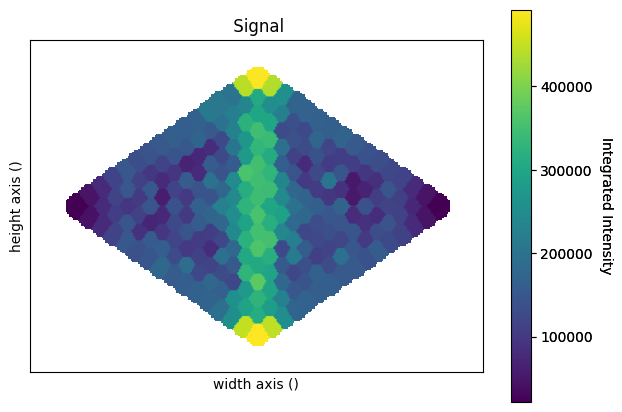

In [1]:
import atomap.api as am

from qem.voronoi import voronoi_integrate

s = am.dummy_data.get_nanoparticle_signal()
points_x, points_y = am.get_atom_positions(s, separation=4).T
integrated_intensity, intensity_record, point_record = voronoi_integrate(s, points_x, points_y, max_radius=10)
intensity_record.plot(cmap='viridis')

Calculating Voronoi:   0%|          | 0/521934 [00:00<?, ?it/s]

Integrating: 100%|██████████| 3681/3681 [00:03<00:00, 955.84it/s]              


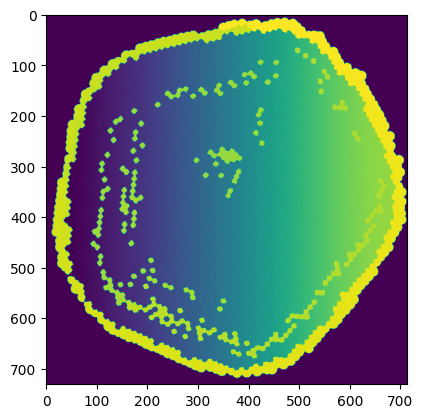

In [29]:
from hyperspy.signals import Signal2D

from qem.voronoi import voronoi_integrate

s = Signal2D(benchmark.image)
points_x, points_y = benchmark.params_qem['pos_x'], benchmark.params_qem['pos_y']
integrated_intensity, intensity_record, point_record = voronoi_integrate(s, points_x, points_y, max_radius=10)

In [1]:
from glob import glob

from hyperspy.signals import Signal2D

from qem.benchmark import Benchmark
from qem.voronoi import voronoi_integrate

file_list = glob('/home/zzhang/OneDrive/code/qem/data/testFitProgram/*.mat')
error_list = []

for file in file_list[1:2]:
    print(file)
    benchmark = Benchmark(file)
    benchmark.refine(plot=False,verbose=False, num_epoch = 20, tol=1e-2,maxiter=100)
    s = Signal2D(benchmark.image - benchmark.params_qem['background'])
    points_x, points_y = benchmark.params_qem['pos_x'], benchmark.params_qem['pos_y']
    integrated_intensity, intensity_record, point_record = voronoi_integrate(s, points_x, points_y, max_radius=20)

INFO:hyperspy.extensions:Enabling extension exspy


/home/zzhang/OneDrive/code/qem/data/testFitProgram/output_fivefoldsymmetry2015_121416_2.mat


Fitting random batch:   0%|          | 0/4 [00:00<?, ?it/s]INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
Fitting random batch: 100%|██████████| 4/4 [00:09<00:00,  2.43s/it]
INFO:root:Convergence rate for pos_x = 1.3966404046839216
INFO:root:Convergence not reached
Fitting random batch: 100%|██████████| 4/4 [00:06<00:00,  1.54s/it]
INFO:root:Convergence rate for pos_x = 1.20562744140625
INFO:root:Convergence not reached
Fitting random batch: 100%|██████████| 4/4 [00:05<00:00,  1.47s/it]
INFO:root:Convergence rate for pos_x = 1.067138671875
INFO:root:Convergence not reached
Fitting random batch: 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]
INFO:root:Convergence rate for pos_x = 1.103668212890625
INFO:root:Conv

Method 'refine' executed in 65.7145 seconds


Integrating: 100%|██████████| 3681/3681 [00:07<00:00, 513.07it/s]               


In [5]:
intensity_record.data = intensity_record.data * benchmark.dx**2

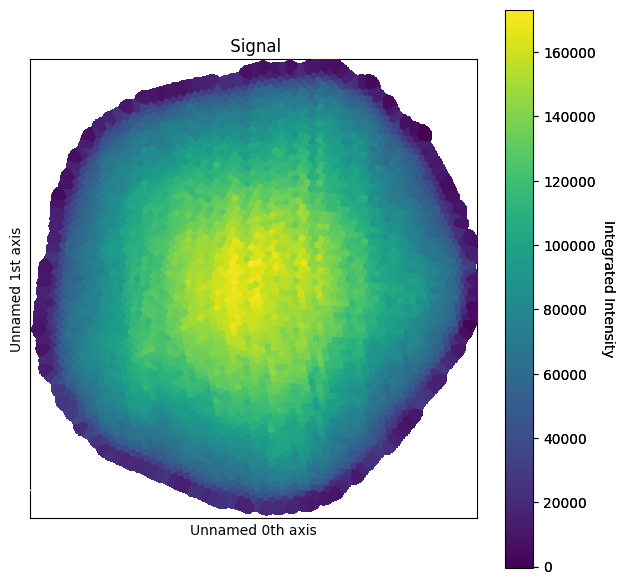

In [6]:
intensity_record.plot(cmap='viridis')

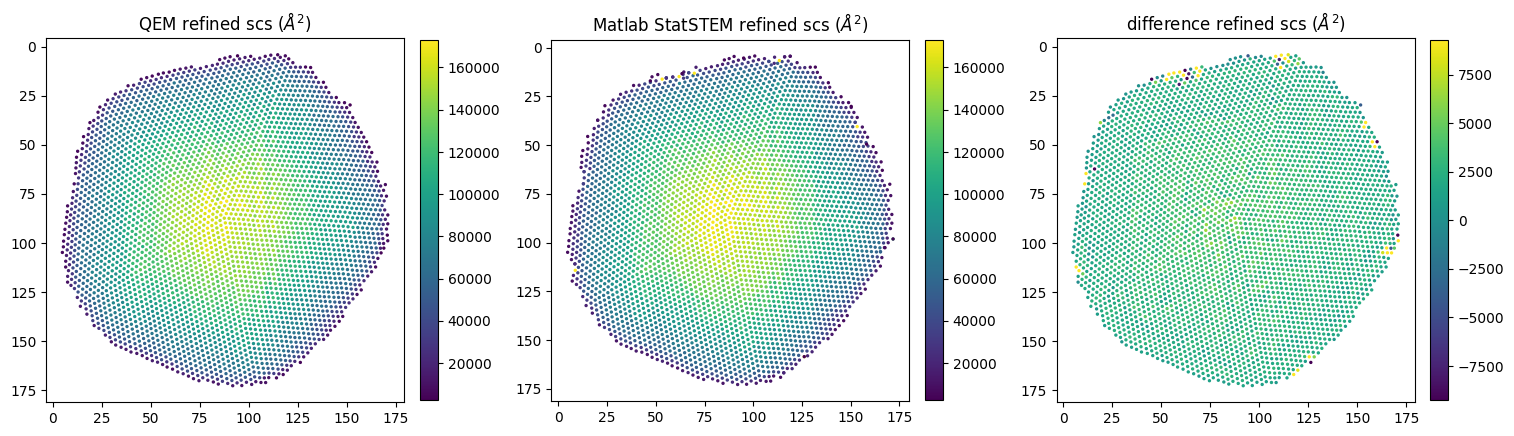

In [26]:
benchmark.compare_scs_map()

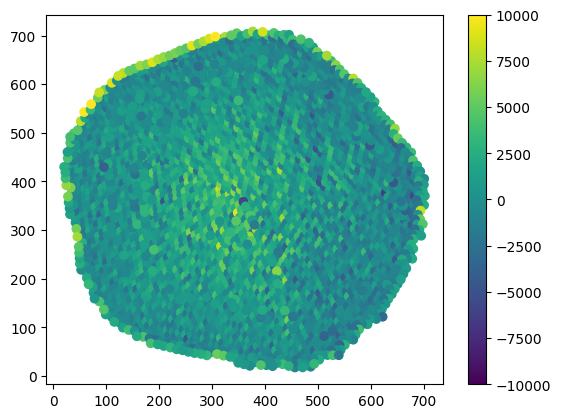

In [7]:
import matplotlib.pyplot as plt

scs_diff = integrated_intensity * benchmark.dx**2 - benchmark.scs_qem 
plt.scatter(benchmark.params_qem['pos_x'], benchmark.params_qem['pos_y'], c=scs_diff, cmap='viridis')
plt.colorbar()
plt.clim(-1e4,1e4)

In [33]:
file = '/home/zzhang/OneDrive/code/qem/examples/Example_PtIr.mat'
benchmark = Benchmark(file)
benchmark.refine(plot=False,verbose=False, num_epoch = 20, tol=1e-2,maxiter=100)
s = Signal2D(benchmark.image)
points_x, points_y = benchmark.params_qem['pos_x'], benchmark.params_qem['pos_y']
integrated_intensity, intensity_record, point_record = integrate(s, points_x, points_y, max_radius=20)

Fitting random batch: 100%|██████████| 1/1 [00:02<00:00,  2.31s/it]
INFO:root:Convergence rate for pos_x = 1.0998705258357688
INFO:root:Convergence not reached
Fitting random batch: 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]
INFO:root:Convergence rate for pos_x = 1.0703125
INFO:root:Convergence not reached
Fitting random batch: 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]
INFO:root:Convergence rate for pos_x = 1.009613037109375
INFO:root:Convergence not reached
Fitting random batch: 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]
INFO:root:Convergence rate for pos_x = 1.010986328125
INFO:root:Convergence not reached
Fitting random batch: 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]
INFO:root:Convergence rate for pos_x = 0.7287673950195312
INFO:root:Convergence rate for pos_y = 0.5202064514160156
INFO:root:Convergence rate for height = 0.041468123594115634
INFO:root:Convergence not reached
Fitting random batch: 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]
INFO:root:Convergence rate 

Method 'refine' executed in 30.6398 seconds


Integrating: 100%|██████████| 135/135 [00:00<00:00, 749.14it/s]                 


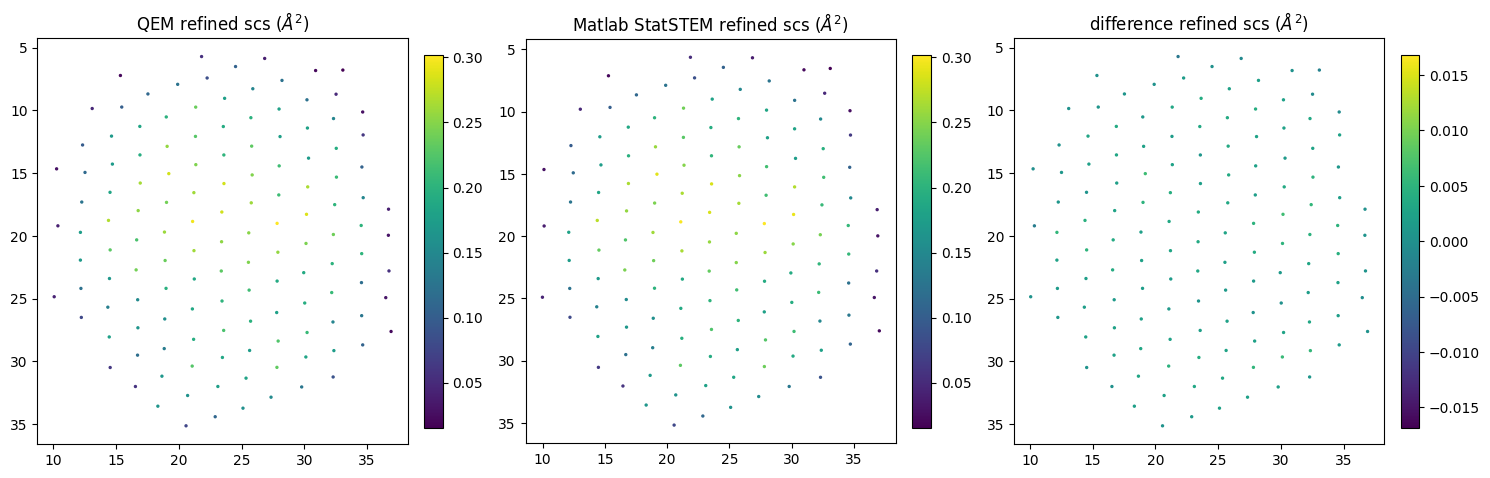

In [42]:
benchmark.compare_scs_map()

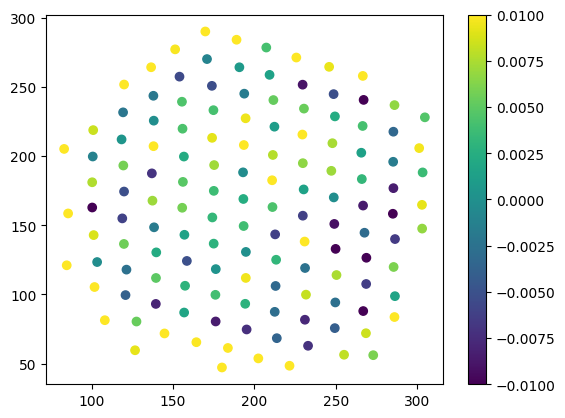

In [38]:
import matplotlib.pyplot as plt

scs_diff = integrated_intensity * benchmark.dx**2 - benchmark.scs_qem 
plt.scatter(benchmark.params_qem['pos_x'], benchmark.params_qem['pos_y'], c=scs_diff, cmap='viridis')
plt.colorbar()
plt.clim(-0.01,0.01)

In [40]:
intensity_record.data = intensity_record.data * benchmark.dx**2

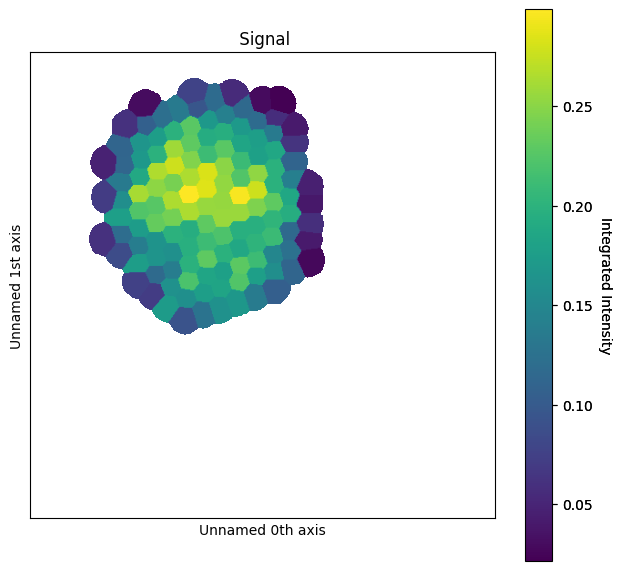

In [41]:

intensity_record.plot(cmap='viridis')